In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from lib.llm.gpt import GPTClient
from dotenv import load_dotenv
import os

load_dotenv()

API_KEY = os.environ["OPEN_AI_API_KEY"]

client = GPTClient(API_KEY)

INFO:lib.log:...Using tool NewsMediaTool with args "California rainy winter 2023"...
INFO:lib.log:......Retrieving www.nytimes.com article with title A Very Wet Winter Has Eased California’s Drought, but Water Woes Remain......
INFO:lib.log:......Retrieving www.nytimes.com article with title What Does All This Rain Mean for California’s Drought?......
INFO:lib.log:......Retrieving www.nytimes.com article with title Powerful Storm Strikes California, From Surging Seas to Mountain Snow......
INFO:lib.log:......Retrieving www.nytimes.com article with title How Climate Change Is Shaping California’s Winter Storms......
INFO:lib.log:......Retrieving Washington Post article with title New winter storm could push California’s snowpack to record high......
INFO:lib.log:......Retrieving Washington Post article with title The science behind California’s extremely wet winter, in maps......
INFO:lib.log:......Retrieving Washington Post article with title In California, a drought turned to floods. 

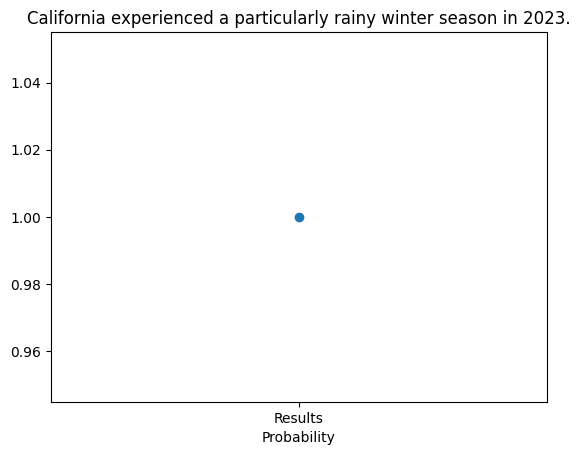

In [3]:
from core.tools.toolbelt import Toolbelt
from core.tools.query.news_media import NewsMediaTool
from lib.log import logger, AgentLogLevel
from core.assembly.research import ResearchAssembly
from core.modelers.modeler import Modeler, Parameter
from matplotlib import pyplot

logger.set_log_level(AgentLogLevel.OUTPUT)

TIMES_TO_RUN = 1

modeler = Modeler(
    client,
    ResearchAssembly,
    parameters=[
        Parameter(
            independent_variable="Results",
            parameters={
                "toolbelt": Toolbelt(
                    client,
                    tools=[
                        NewsMediaTool(client, n_articles=10, start_date="2023-01-01", end_date="2023-05-01")
                    ]
                ),
                "n_agents": 10,
                "max_articles_per_agent": 8,
            }
        )
        for i in range(TIMES_TO_RUN)
    ],
    max_concurrency=1
)
results = await modeler.model(
    "California experienced a particularly rainy winter season in 2023.",
)
variables = modeler.get_plot_variables(results)

pyplot.scatter(*variables)
pyplot.xlabel("Agreement (n_agents=10)")
pyplot.title("\"California experienced a particularly rainy winter season in 2023.\"")
pyplot.xlim(0, 1)
pyplot.show()

INFO:lib.log:...Using tool NewsMediaTool with args "California dry winter 2023"...
INFO:lib.log:......Retrieving www.nytimes.com article with title A Very Wet Winter Has Eased California’s Drought, but Water Woes Remain......
INFO:lib.log:......Retrieving CNN article with title Record snowpack, nearly full reservoirs: Here's the state of California's drought after an epic winter | CNN......
INFO:lib.log:......Retrieving CNN article with title California's snowfall so far this winter rivals the state's record-setting season, officials say | CNN......
INFO:lib.log:......Retrieving Washington Post article with title In California, a drought turned to floods. Forecasters didn’t see it coming.......
INFO:lib.log:......Retrieving www.nytimes.com article with title How Did a La Niña Winter Become So Rainy?......
INFO:lib.log:......Retrieving CNN article with title Southern California water board rescinds emergency conservation measures following winter storms | CNN......
INFO:lib.log:......Re

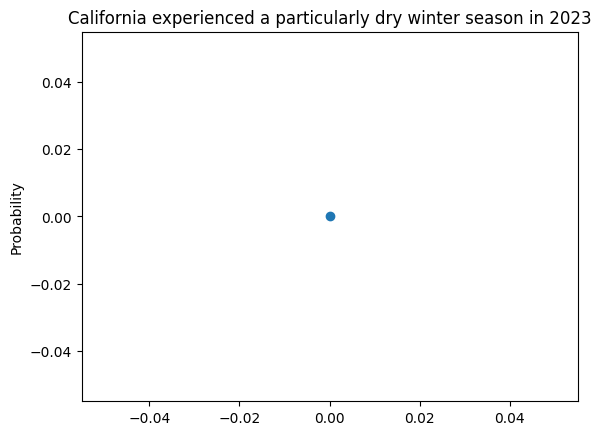

In [7]:
from core.tools.toolbelt import Toolbelt
from core.tools.query.news_media import NewsMediaTool
from lib.log import logger, AgentLogLevel
from core.assembly.research import ResearchAssembly
from core.modelers.modeler import Modeler, Parameter
from matplotlib import pyplot

logger.set_log_level(AgentLogLevel.OUTPUT)

TIMES_TO_RUN = 1

modeler = Modeler(
    client,
    ResearchAssembly,
    parameters=[
        Parameter(
            independent_variable=i,
            parameters={
                "toolbelt": Toolbelt(
                    client,
                    tools=[
                        NewsMediaTool(client, n_articles=10, start_date="2023-01-01", end_date="2023-05-01")
                    ]
                ),
                "n_agents": 10,
                "max_articles_per_agent": 8,
            }
        )
        for i in range(TIMES_TO_RUN)
    ],
    max_concurrency=1
)
results = await modeler.model(
    "California experienced a particularly dry winter season in 2023.",
)
variables = modeler.get_plot_variables(results)

pyplot.xkcd()
pyplot.scatter(*variables)
pyplot.xlabel("Agreement (n_agents=10)")
pyplot.title("\"California experienced a particularly dry winter season in 2023\"")
pyplot.xlim(0, 1)
pyplot.show()

In [8]:
from core.tools.toolbelt import Toolbelt
from core.tools.query.news_media import NewsMediaTool
from lib.log import logger, AgentLogLevel
from core.assembly.research import ResearchAssembly
from core.modelers.modeler import Modeler, Parameter

logger.set_log_level(AgentLogLevel.OUTPUT)
date_ranges = [
    ('2022-05-01', '2022-06-01'),
    ('2022-06-01', '2022-07-01'),
    ('2022-07-01', '2022-08-01'),
    ('2022-08-01', '2022-09-01'),
    ('2022-09-01', '2022-10-01'),
    ('2022-10-01', '2022-11-05'),
]

modeler = Modeler(
    client,
    ResearchAssembly,
    parameters=[
        Parameter(
            independent_variable=range[1],
            parameters={
                "n_agents": 50,
                "max_articles_per_agent": 3,
                "max_concurrency": 10,
                "toolbelt": Toolbelt(
                    client,
                    [NewsMediaTool(client, n_articles=10,start_date=range[0], end_date=range[1])]
                ),
            } 
        )
        for range in date_ranges
    ],
    max_concurrency=1
)

results = await modeler.model(
    "Democrats will maintain control of the Senate in the 2022 November Midterm elections.",
)

INFO:lib.log:...Using tool NewsMediaTool with args "Senate control 2022 midterm elections Democrats"...
INFO:lib.log:......Retrieving Washington Post article with title The fight for control of the U.S. Senate......
INFO:lib.log:......Retrieving CNN article with title The 10 Senate seats most likely to flip in 2022 | CNN Politics......
INFO:lib.log:......Retrieving CNN article with title The 3 things that need to happen for Democrats to keep the Senate | CNN Politics......
INFO:lib.log:......Retrieving Washington Post article with title The fight for control of the U.S. House......
INFO:lib.log:......Retrieving Bloomberg.com article with title The US Midterms Are Happening Now. Here Are the Key Primaries to Watch......
INFO:lib.log:......Retrieving www.nytimes.com article with title 10 Senate races to watch this year. (Published 2022)......
INFO:lib.log:......Retrieving Washington Post article with title Your guide to the 2022 midterm elections......
INFO:lib.log:......Retrieving Washi

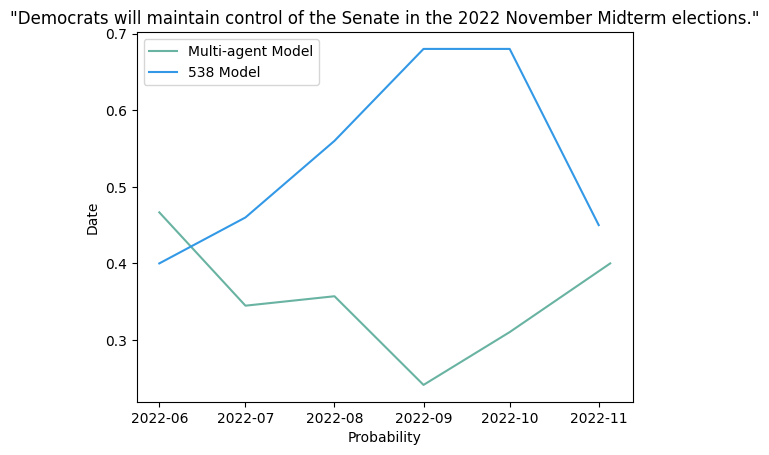

In [13]:
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import pyplot

COLOR_SENTIMENT = "#69b3a2"
COLOR_SAP = "#3399e6"
  
variables = modeler.get_plot_variables(results)


# plotting the points 

pyplot.plot([datetime(int(r[0:4]), int(r[5:7]), int(r[8:10])) for r in variables[0]], variables[1], color=COLOR_SENTIMENT, label="Multi-agent Model")
pyplot.plot([datetime(int(r[0:4]), int(r[4:6]), int(r[6:8])) for r in ['20220601', '20220701', '20220801', '20220901', '20221001', '20221101']], [1 - r for r in [0.60, 0.54, 0.44, 0.32, 0.32, 0.55]], color=COLOR_SAP, label="538 Model")

pyplot.xlabel("Probability")
pyplot.ylabel("Date")

pyplot.legend(loc="upper left")
  
# giving a title to my graph
pyplot.title('"Democrats will maintain control of the Senate in the 2022 November Midterm elections."')
  
# function to show the plot
pyplot.show()

In [3]:
from core.tools.toolbelt import Toolbelt
from core.tools.query.news_media import NewsMediaTool
from lib.log import logger, AgentLogLevel
from core.assembly.debate import DebateAssembly
from core.assembly.research import ResearchAssembly
from core.modelers.modeler import Modeler, Parameter
from matplotlib import pyplot

logger.set_log_level(AgentLogLevel.OUTPUT)

sources = [
    "nytimes.com",
    "washingtonpost.com",
    "wsj.com",
    "economist.com",
    "cnn.com",
    "foxnews.com",
]

modeler = Modeler(
    client,
    ResearchAssembly,
    parameters=[
        Parameter(
            independent_variable=source,
            parameters={
                "toolbelt": Toolbelt(
                    client,
                    tools=[
                        NewsMediaTool(client, n_articles=20, start_date="2022-06-01", end_date="2023-05-01", only_include_sources=[source])
                    ]
                ),
                "n_agents": 50,
                "max_articles_per_agent": 3,
                "max_concurrency": 10,
            }
        )
        for source in sources
    ],
    max_concurrency=1
)
results = await modeler.model(
    "The Biden administration has not done an effective job of managing inflation.",
)


INFO:lib.log:...Using tool NewsMediaTool with args "Biden administration managing inflation"...
INFO:lib.log:......Retrieving www.nytimes.com article with title Sobering Inflation Report Dampens Biden’s Claims of Economic Progress......
INFO:lib.log:......Retrieving www.nytimes.com article with title White House Expects Slower Economic Growth in 2022 Than Originally Projected......
INFO:lib.log:......Retrieving www.nytimes.com article with title Slowing Inflation Gives Biden Respite, but High Prices Remain a Problem......
INFO:lib.log:......Retrieving www.nytimes.com article with title September Inflation Report: Prices Rise Faster Than Expected......
INFO:lib.log:......Retrieving www.nytimes.com article with title An ‘Ugly’ Inflation Report Upended Hopes That Price Gains Would Ease......
INFO:lib.log:......Retrieving www.nytimes.com article with title Biden Concedes Defeat on Climate Bill as Manchin and Inflation Upend Agenda......
INFO:lib.log:......Retrieving www.nytimes.com article

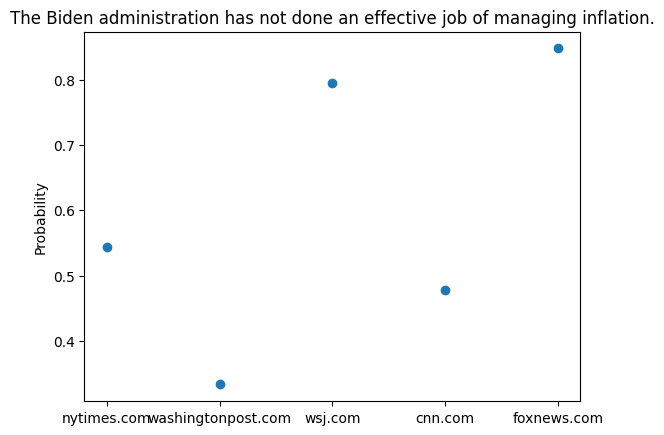

In [6]:
variables = modeler.get_plot_variables([result for result in results if result.parameter.independent_variable != "economist.com"])
pyplot.scatter(*variables)
pyplot.ylabel("Probability")
pyplot.title("The Biden administration has not done an effective job of managing inflation.")
pyplot.show()